In [9]:
import pandas as pd
import numpy as np
import requests,json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas.io.json import json_normalize

In [10]:
covid_data={}
URL='https://api.covid19india.org/'

for i in range(1,8):
    path=URL+'raw_data{}.json'.format(i)
    filename='CovidData_{}.json'.format(i)
    patient_data = requests.get(path)
    patdata_json = patient_data.json()
    patdata_json = patdata_json['raw_data']
    patdata_serial=json.dumps(patdata_json,indent=4)
    with open(filename,'w') as outf:
        outf.write(patdata_serial)

In [11]:
df1=pd.read_json('CovidData_1.json')
df2=pd.read_json('CovidData_2.json')
df3=pd.read_json('CovidData_3.json')
df4=pd.read_json('CovidData_4.json')
df5=pd.read_json('CovidData_5.json')
df6=pd.read_json('CovidData_6.json')
df7=pd.read_json('CovidData_7.json')

In [13]:
frame = [df1,df2,df3,df4,df5,df6,df7]

In [14]:
total_cases = pd.concat(frame)

C:\Users\hp1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [15]:
total_cases.sample(5)

,agebracket,backupnotes,contractedfromwhichpatientsuspected,currentstatus,dateannounced,detectedcity,detecteddistrict,detectedstate,entryid,estimatedonsetdate,...,notes,numcases,patientnumber,source1,source2,source3,statecode,statepatientnumber,statuschangedate,typeoftransmission
16223,,,,Hospitalized,19/04/2020,,Tenkasi,Tamil Nadu,NaN,,...,Details awaited,1,16223,https://stopcorona.tn.gov.in/wp-content/upload...,,,TN,TN-P1448,19/04/2020,
14675,,NaN,,Hospitalized,31/05/2020,Nathnagar,Bhagalpur,Bihar,42896,NaN,...,,1,71832,https://twitter.com/BiharHealthDept/status/126...,,,BR,,,
3452,,NaN,,Hospitalized,03/05/2020,,Gurdaspur,Punjab,3452,NaN,...,,25,31343,https://twitter.com/kbssidhu1961/status/125693...,,,PB,,,
5592,,NaN,,Hospitalized,14/05/2020,,Barmer,Rajasthan,15601,NaN,...,,8,44540,https://t.me/indiacovid/4771,,,RJ,,,
12781,12,NaN,,Hospitalized,13/06/2020,,Davanagere,Karnataka,61412,NaN,...,Contact of P- 6040,1,90782,https://twitter.com/DHFWKA/status/127178463803...,,,KA,KA-P6577,,


In [16]:
total_cases.shape

(108648, 22)

In [17]:
total_cases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108648 entries, 0 to 8363
Data columns (total 22 columns):
agebracket                             108648 non-null object
backupnotes                            28183 non-null object
contractedfromwhichpatientsuspected    108648 non-null object
currentstatus                          108648 non-null object
dateannounced                          108648 non-null object
detectedcity                           108648 non-null object
detecteddistrict                       108648 non-null object
detectedstate                          108648 non-null object
entryid                                80465 non-null object
estimatedonsetdate                     28183 non-null object
gender                                 108648 non-null object
nationality                            108648 non-null object
notes                                  108648 non-null object
numcases                               108648 non-null object
patientnumber             

In [18]:
total_cases.replace("",np.NaN,inplace=True)

In [19]:
total_cases.shape

(108648, 22)

In [20]:
total_cases.isna().sum()

agebracket                              67885
backupnotes                            108287
contractedfromwhichpatientsuspected    106725
currentstatus                             101
dateannounced                              67
detectedcity                            99927
detecteddistrict                         8087
detectedstate                             108
entryid                                 28218
estimatedonsetdate                     108648
gender                                  65163
nationality                            105939
notes                                   68103
numcases                                  102
patientnumber                             491
source1                                  1947
source2                                103555
source3                                108153
statecode                                 108
statepatientnumber                      82577
statuschangedate                        80868
typeoftransmission                

In [21]:
missing_percent = total_cases.isnull().sum()*100/len(total_cases)
missing_df = pd.DataFrame({'columns':total_cases.columns,'missing_percent':missing_percent})


In [22]:
missing_df

,columns,missing_percent
agebracket,agebracket,62.481592
backupnotes,backupnotes,99.667734
contractedfromwhichpatientsuspected,contractedfromwhichpatientsuspected,98.230064
currentstatus,currentstatus,0.092961
dateannounced,dateannounced,0.061667
detectedcity,detectedcity,91.973161
detecteddistrict,detecteddistrict,7.443303
detectedstate,detectedstate,0.099404
entryid,entryid,25.971946
estimatedonsetdate,estimatedonsetdate,100.000000


In [24]:
#ax=sns.heatmap(total_cases.corr(),annot=True,fmt='.2f',cmap='rocket_r');
#bottom, top = ax.get_ylim()
#ax.set_ylim(bottom + 0.5, top - 0.5);

In [25]:
total_cases.drop(['backupnotes','contractedfromwhichpatientsuspected','detectedcity','source2','source3','statecode','notes','estimatedonsetdate'],axis=1,inplace=True)

In [26]:
total_cases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108648 entries, 0 to 8363
Data columns (total 14 columns):
agebracket            40763 non-null object
currentstatus         108547 non-null object
dateannounced         108581 non-null object
detecteddistrict      100561 non-null object
detectedstate         108540 non-null object
entryid               80430 non-null object
gender                43485 non-null object
nationality           2709 non-null object
numcases              108546 non-null object
patientnumber         108157 non-null object
source1               106701 non-null object
statepatientnumber    26071 non-null object
statuschangedate      27780 non-null object
typeoftransmission    2990 non-null object
dtypes: object(14)
memory usage: 12.4+ MB


In [27]:
total_cases.isna().sum()

agebracket             67885
currentstatus            101
dateannounced             67
detecteddistrict        8087
detectedstate            108
entryid                28218
gender                 65163
nationality           105939
numcases                 102
patientnumber            491
source1                 1947
statepatientnumber     82577
statuschangedate       80868
typeoftransmission    105658
dtype: int64

In [28]:
total_cases.typeoftransmission.value_counts()

Local        1720
TBD           637
Imported      630
Imported        2
Unknown         1
Name: typeoftransmission, dtype: int64

In [29]:
total_cases.detectedstate.value_counts()

Tamil Nadu                                  24784
Karnataka                                   16377
Maharashtra                                 11578
Bihar                                        9145
Uttar Pradesh                                6847
Gujarat                                      5908
Rajasthan                                    5022
Madhya Pradesh                               4376
Delhi                                        3089
Andhra Pradesh                               2724
West Bengal                                  2258
Kerala                                       1958
Odisha                                       1873
Jammu and Kashmir                            1810
Haryana                                      1649
Telangana                                    1556
Punjab                                       1453
Uttarakhand                                   936
Assam                                         887
Chhattisgarh                                  873


### Two Datasets created - Dataset with Ages and Dataset with missing ages

In [65]:
df_missingages = total_cases[total_cases['agebracket'].isna()]
df_final = total_cases[total_cases['agebracket'].isna()==False]

In [66]:
df_missingages.head()

,agebracket,currentstatus,dateannounced,detecteddistrict,detectedstate,entryid,gender,nationality,numcases,patientnumber,source1,statepatientnumber,statuschangedate,typeoftransmission
1,NaN,Recovered,02/02/2020,Alappuzha,Kerala,NaN,NaN,India,1,2,https://www.indiatoday.in/india/story/kerala-r...,KL-AL-P1,14/02/2020,Imported
2,NaN,Recovered,03/02/2020,Kasaragod,Kerala,NaN,NaN,India,1,3,https://www.indiatoday.in/india/story/kerala-n...,KL-KS-P1,14/02/2020,Imported
21,NaN,Hospitalized,04/03/2020,Agra,Uttar Pradesh,NaN,M,India,1,22,https://www.businesstoday.in/latest/trends/cor...,NaN,04/03/2020,Local
22,NaN,Recovered,04/03/2020,Agra,Uttar Pradesh,NaN,F,India,1,23,https://www.businesstoday.in/latest/trends/cor...,NaN,15/03/2020,Local
24,NaN,Recovered,04/03/2020,Agra,Uttar Pradesh,NaN,M,India,1,25,https://www.businesstoday.in/latest/trends/cor...,NaN,15/03/2020,Local


In [67]:
df_final.head()

,agebracket,currentstatus,dateannounced,detecteddistrict,detectedstate,entryid,gender,nationality,numcases,patientnumber,source1,statepatientnumber,statuschangedate,typeoftransmission
0,20,Recovered,30/01/2020,Thrissur,Kerala,NaN,F,India,1,1,https://twitter.com/vijayanpinarayi/status/122...,KL-TS-P1,14/02/2020,Imported
3,45,Recovered,02/03/2020,East Delhi,Delhi,NaN,M,India,1,4,https://www.indiatoday.in/india/story/not-a-ja...,DL-P1,15/03/2020,Imported
4,24,Recovered,02/03/2020,Hyderabad,Telangana,NaN,M,India,1,5,https://www.deccanherald.com/national/south/qu...,TS-P1,02/03/2020,Imported
5,69,Recovered,03/03/2020,Italians,Rajasthan,NaN,M,Italy,1,6,https://indianexpress.com/article/india/corona...,NaN,03/03/2020,Imported
6,55,Recovered,04/03/2020,Italians,Haryana,NaN,NaN,Italy,1,7,https://indianexpress.com/article/india/corona...,NaN,29/03/2020,Imported


In [68]:
df_final.shape

(40763, 14)

In [69]:
df_final.isna().sum()

agebracket                0
currentstatus             0
dateannounced             0
detecteddistrict         24
detectedstate             0
entryid                2346
gender                  718
nationality           39848
numcases                  0
patientnumber            48
source1                  88
statepatientnumber    22833
statuschangedate      38419
typeoftransmission    39612
dtype: int64

In [70]:
df_final.drop(['statepatientnumber','statuschangedate','typeoftransmission','nationality','numcases'],axis=1,inplace=True)

In [71]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40763 entries, 0 to 7994
Data columns (total 9 columns):
agebracket          40763 non-null object
currentstatus       40763 non-null object
dateannounced       40763 non-null object
detecteddistrict    40739 non-null object
detectedstate       40763 non-null object
entryid             38417 non-null object
gender              40045 non-null object
patientnumber       40715 non-null object
source1             40675 non-null object
dtypes: object(9)
memory usage: 3.1+ MB


In [72]:
df_final.isna().sum()

agebracket             0
currentstatus          0
dateannounced          0
detecteddistrict      24
detectedstate          0
entryid             2346
gender               718
patientnumber         48
source1               88
dtype: int64

In [73]:
df_final['gender'].fillna(df_final['gender'].mode()[0],inplace=True)

In [74]:
#df_final.dropna(inplace=True)
df_final.rename(columns={'agebracket':'age','currentstatus':'status','detecteddistrict':'district','detectedstate':'state','dateannounced':'date'},inplace=True)

In [75]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40763 entries, 0 to 7994
Data columns (total 9 columns):
age              40763 non-null object
status           40763 non-null object
date             40763 non-null object
district         40739 non-null object
state            40763 non-null object
entryid          38417 non-null object
gender           40763 non-null object
patientnumber    40715 non-null object
source1          40675 non-null object
dtypes: object(9)
memory usage: 3.1+ MB


In [76]:
df_final['date']=pd.to_datetime(df_final['date'],dayfirst=True)

C:\Users\hp1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [77]:
df_final['date'].value_counts().sort_index()

2020-01-30      1
2020-03-02      2
2020-03-03      1
2020-03-04     17
2020-03-05      2
             ... 
2020-06-20    663
2020-06-21    626
2020-06-22    493
2020-06-23    499
2020-06-24    641
Name: date, Length: 115, dtype: int64

In [78]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40763 entries, 0 to 7994
Data columns (total 9 columns):
age              40763 non-null object
status           40763 non-null object
date             40763 non-null datetime64[ns]
district         40739 non-null object
state            40763 non-null object
entryid          38417 non-null object
gender           40763 non-null object
patientnumber    40715 non-null object
source1          40675 non-null object
dtypes: datetime64[ns](1), object(8)
memory usage: 3.1+ MB


### Claeaning 'Age' Column

In [93]:
df_final['age'].value_counts()

30          1544
25          1347
35          1321
40          1249
32          1141
            ... 
5 months       1
0.4            1
1.6            1
0.33           1
54.9           1
Name: age, Length: 119, dtype: int64

In [79]:
df_final[df_final['age']=='28-35']

,age,status,date,district,state,entryid,gender,patientnumber,source1
924,28-35,Hospitalized,2020-03-28,Bandipora,Jammu and Kashmir,NaN,M,925,https://twitter.com/ANI/status/124383125547019...
925,28-35,Hospitalized,2020-03-28,Bandipora,Jammu and Kashmir,NaN,M,926,https://twitter.com/ANI/status/124383125547019...
926,28-35,Hospitalized,2020-03-28,Bandipora,Jammu and Kashmir,NaN,M,927,https://twitter.com/ANI/status/124383125547019...
927,28-35,Hospitalized,2020-03-28,Bandipora,Jammu and Kashmir,NaN,M,928,https://twitter.com/ANI/status/124383125547019...


In [95]:
df_final['age'].replace('28-35','32',inplace=True)

In [96]:
df_final.drop(df_final[df_final['age']=='F' ].index,inplace=True)
df_final.drop(df_final[df_final['age']=='M' ].index,inplace=True)

In [97]:
df_final[df_final['age']=='M']

,age,status,date,district,state,entryid,gender,patientnumber,source1


In [98]:
 df_final[(df_final['age']=='5 Months')| (df_final['age']=='5 months')]

,age,status,date,district,state,entryid,gender,patientnumber,source1
2122,5 months,Hospitalized,2020-06-21,Bagalkote,Karnataka,74188,F,103558,https://twitter.com/DHFWKA/status/127469398451...
3930,5 Months,Hospitalized,2020-06-22,Chikkamagaluru,Karnataka,76001,M,105371,https://twitter.com/DHFWKA/status/127504580905...


In [99]:
df_final[df_final['age']=='5 months']

,age,status,date,district,state,entryid,gender,patientnumber,source1
2122,5 months,Hospitalized,2020-06-21,Bagalkote,Karnataka,74188,F,103558,https://twitter.com/DHFWKA/status/127469398451...


In [100]:
df_final['age'].replace(['11 Months','6 Months','4 Months','9 Months','5 Months','5 months'],['0.9','0.5','0.3','0.7','0.5','0.5'],inplace=True)

In [101]:
df_final['age'] = df_final['age'].astype(str).astype(float)

C:\Users\hp1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [102]:
df_final['age'].value_counts().sort_index()

0.00      3
0.10     14
0.20      3
0.25      1
0.30      4
         ..
95.00     4
96.00     2
97.00     1
98.00     2
99.00     3
Name: age, Length: 117, dtype: int64

In [103]:
df_final.drop(df_final[df_final['age']==0].index,inplace=True)

#### No. of new born children COVID cases

In [104]:
df_final[df_final['age']<1].shape[0]

40

#### Creating age groups to make the count of people understandable

In [105]:
newBorn=df_final[df_final['age']<1]
c_newBorn=newBorn.shape[0]
c_newBorn

40

In [106]:
child=df_final[(df_final['age']>=1) &(df_final['age']<=12)]
c_child=child.shape[0]
c_child

2865

In [107]:
young=df_final[(df_final['age']>13) &(df_final['age']<=24)]
c_young=young.shape[0]
c_young

7636

In [108]:
adult=df_final[(df_final['age']>=25) &(df_final['age']<=55)]
c_adult=adult.shape[0]
c_adult

24744

In [109]:
old=df_final[df_final['age']>55]
c_old=old.shape[0]
c_old

5144

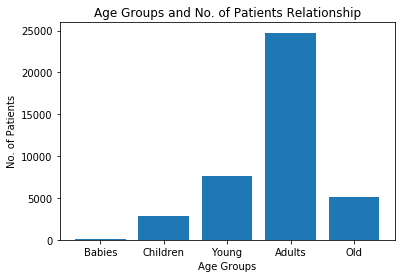

In [110]:
plt.bar(x=['Babies','Children','Young','Adults','Old'],height=[c_newBorn,c_child,c_young,c_adult,c_old]);
plt.xlabel("Age Groups");
plt.ylabel("No. of Patients");
plt.title('Age Groups and No. of Patients Relationship');

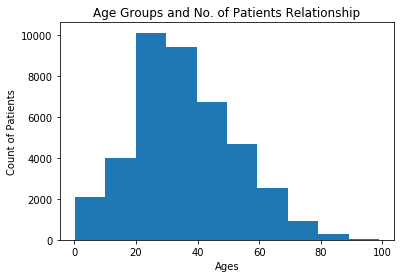

In [111]:
plt.hist(df_final['age']);
plt.xlabel('Ages');
plt.ylabel('Count of Patients');
plt.title('Age Groups and No. of Patients Relationship');

#### Cleaning 'gender' column

In [112]:
df_final.gender.value_counts()

M             27631
F             13114
Non-Binary        7
NA                3
M                 1
Name: gender, dtype: int64

In [113]:
df_final.replace(['Non-Binary','NA'],'Others',inplace=True)

C:\Users\hp1\Anaconda3\lib\site-packages\pandas\core\frame.py:4263: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [114]:
df_final.gender.value_counts()

M         27631
F         13114
Others       10
M             1
Name: gender, dtype: int64

In [115]:
df_final = df_final.query('gender=="M" or gender=="F" or gender=="Others"')

In [116]:
df_final.gender.value_counts()

M         27631
F         13114
Others       10
Name: gender, dtype: int64

In [117]:
df_final.state.value_counts()

Tamil Nadu                                  20502
Karnataka                                   10199
Bihar                                        7955
Andhra Pradesh                                414
Chandigarh                                    343
Gujarat                                       288
Odisha                                        276
Kerala                                        259
Maharashtra                                    65
Manipur                                        56
Uttarakhand                                    48
Telangana                                      48
Uttar Pradesh                                  46
Punjab                                         39
Rajasthan                                      37
West Bengal                                    27
Haryana                                        25
Madhya Pradesh                                 21
Himachal Pradesh                               17
Delhi                                          15


In [118]:
df_final.district.value_counts().sort_index()

ARWAL             1
AURANGABAD        1
Agra              3
Ahmedabad       174
Ahmednagar        1
               ... 
Yadgir          906
Yavatmal          1
bhagalpur         3
chengalpattu      2
chennai           4
Name: district, Length: 327, dtype: int64

In [119]:
df_final[df_final['district']=="Airport Quarantine"]

,age,status,date,district,state,entryid,gender,patientnumber,source1
2766,31.0,Hospitalized,2020-05-12,Airport Quarantine,Tamil Nadu,12775,M,41714,https://stopcorona.tn.gov.in/wp-content/upload...
2767,32.0,Hospitalized,2020-05-12,Airport Quarantine,Tamil Nadu,12776,M,41715,https://stopcorona.tn.gov.in/wp-content/upload...
2768,48.0,Hospitalized,2020-05-12,Airport Quarantine,Tamil Nadu,12777,M,41716,https://stopcorona.tn.gov.in/wp-content/upload...
2769,30.0,Hospitalized,2020-05-12,Airport Quarantine,Tamil Nadu,12778,M,41717,https://stopcorona.tn.gov.in/wp-content/upload...
4140,37.0,Hospitalized,2020-05-13,Airport Quarantine,Tamil Nadu,14149,F,43088,https://stopcorona.tn.gov.in/wp-content/upload...
...,...,...,...,...,...,...,...,...,...
13716,25.0,Hospitalized,2020-05-31,Airport Quarantine,Tamil Nadu,41937,F,70873,https://stopcorona.tn.gov.in/wp-content/upload...
13721,34.0,Hospitalized,2020-05-31,Airport Quarantine,Tamil Nadu,41942,M,70878,https://stopcorona.tn.gov.in/wp-content/upload...
13812,30.0,Hospitalized,2020-05-31,Airport Quarantine,Tamil Nadu,42033,M,70969,https://stopcorona.tn.gov.in/wp-content/upload...
13817,51.0,Hospitalized,2020-05-31,Airport Quarantine,Tamil Nadu,42038,Others,70974,https://stopcorona.tn.gov.in/wp-content/upload...


In [120]:
italians_list = df_final[df_final['district']=="Italians"].index

In [121]:
df_final['district'].replace(['Italians','Airport Quarantine'], np.NaN,inplace=True)

In [122]:
df_final.sample(15)

,age,status,date,district,state,entryid,gender,patientnumber,source1
6705,30.0,Hospitalized,2020-06-24,Madhubani,Bihar,78779,M,108147,https://twitter.com/BiharHealthDept/status/127...
5273,6.0,Hospitalized,2020-06-08,Udupi,Karnataka,53904,M,83274,https://twitter.com/DHFWKA/status/126996978184...
16955,25.0,Hospitalized,2020-06-02,Kalaburagi,Karnataka,45160,M,74085,https://twitter.com/DHFWKA/status/126783039441...
9247,21.0,Hospitalized,2020-05-09,Chennai,Tamil Nadu,9247,M,37140,https://stopcorona.tn.gov.in/wp-content/upload...
6573,34.0,Hospitalized,2020-06-09,Madhepura,Bihar,55204,M,84574,https://twitter.com/BiharHealthDept/status/127...
641,24.0,Recovered,2020-03-25,Raipur,Chhattisgarh,NaN,F,642,https://timesofindia.indiatimes.com/city/raip...
14199,28.0,Hospitalized,2020-05-31,Belagavi,Karnataka,42420,F,71356,https://twitter.com/DHFWKA/status/126707739902...
13659,44.0,Hospitalized,2020-05-21,Chennai,Tamil Nadu,23664,F,52606,https://stopcorona.tn.gov.in/wp-content/upload...
4164,70.0,Hospitalized,2020-05-04,Chennai,Tamil Nadu,4164,M,32055,https://stopcorona.tn.gov.in/wp-content/upload...
1769,41.0,Hospitalized,2020-04-30,Chennai,Tamil Nadu,1770,F,29661,https://stopcorona.tn.gov.in/wp-content/upload...


In [123]:
#Skewness is within range -1 to +1
df_final['age'].skew()

0.39075493253006066

#### Calculating percentage using a method

In [124]:
def calc_percent(count,total):
    return ((count/total)*100)

In [125]:
df_final.status.value_counts()

Hospitalized      39924
Deceased            644
Recovered           184
Migrated_Other        3
Name: status, dtype: int64

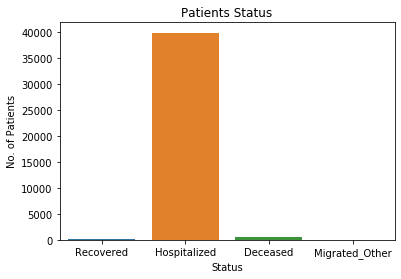

In [126]:
sns.countplot(data=df_final,x='status');
plt.xlabel('Status');
plt.ylabel('No. of Patients');
plt.title('Patients Status');

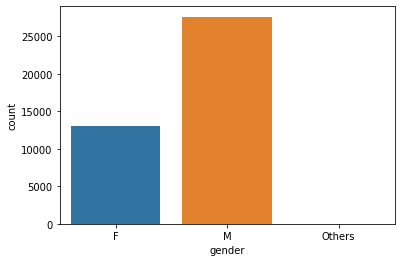

In [127]:
sns.countplot(data=df_final,x='gender');


Text(0, 0.5, 'Counts')

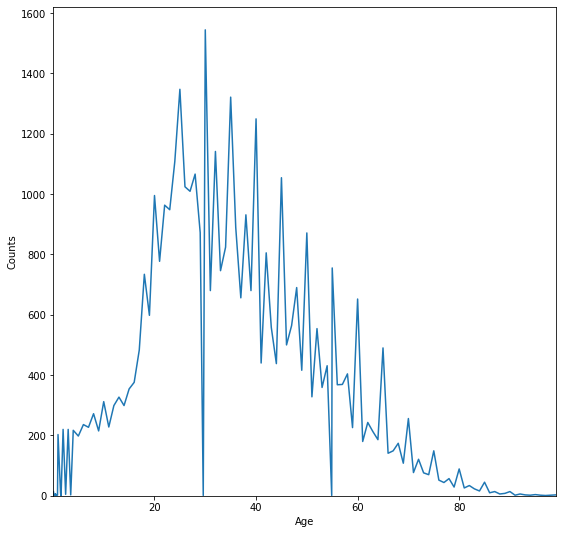

In [129]:
plt.figure(figsize=(9,9))
df_final['age'].value_counts().sort_index().plot(kind='line');
plt.ylim(bottom=0);
plt.xlabel('Age')
plt.ylabel('Counts')

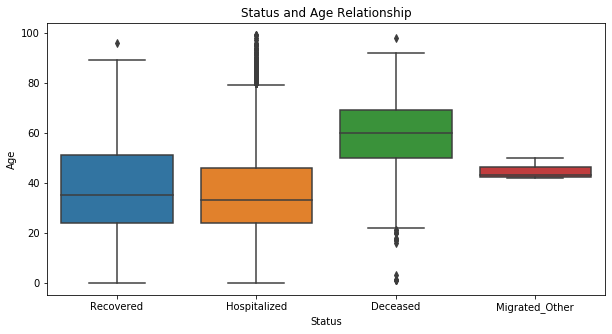

In [130]:
plt.figure(figsize=(10,5))
sns.boxplot(x='status',y='age', data=df_final);
plt.title('Status and Age Relationship');
plt.xlabel('Status');
plt.ylabel('Age');

In [131]:
dcs = df_final[df_final['status']=='Deceased']

In [132]:
mean_dcs = dcs['age'].mean()
median_dcs=dcs['age'].median()
print('Mean Age of Deceased Persons is: {0} and Median is :{1}'.format(mean_dcs,median_dcs))

Mean Age of Deceased Persons is: 58.840062111801245 and Median is :60.0


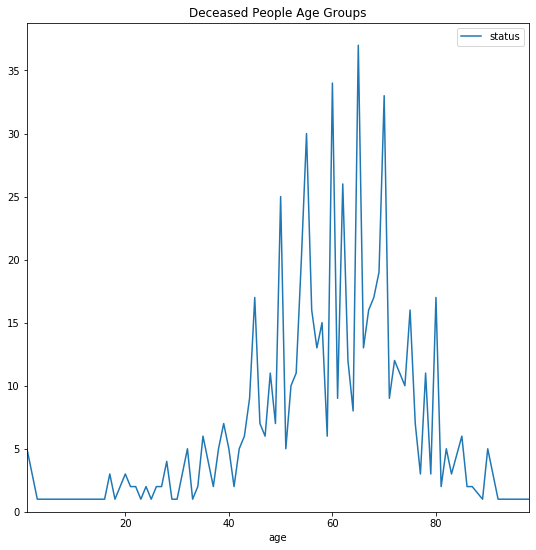

In [133]:

df_dcs = dcs[['age','status']].groupby('age').count()
df_dcs.plot(kind='line', figsize=(9,9));
plt.ylim(bottom=0)
plt.title('Deceased People Age Groups');

In [134]:
rec = df_final[df_final['status']=='Recovered']
mean_rec = rec['age'].mean()
median_rec = rec['age'].median()
print('Mean Age of Deceased Persons is: {0} and Median is :{1}'.format(mean_rec,median_rec))

Mean Age of Deceased Persons is: 37.05815217391305 and Median is :35.0


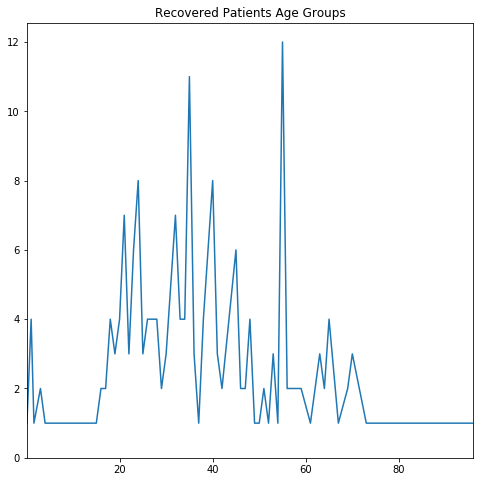

In [135]:
plt.figure(figsize=(8,8));
rec['age'].value_counts().sort_index().plot(kind='line');
plt.ylim(bottom=0)
plt.title('Recovered Patients Age Groups');

In [136]:
hosp = df_final[df_final['status']=='Hospitalized']
mean_hosp = hosp['age'].mean()
median_hosp = hosp['age'].median()
print('Mean Age of Deceased Persons is: {0} and Median is :{1}'.format(mean_hosp,median_hosp))

Mean Age of Deceased Persons is: 35.032161607053396 and Median is :33.0


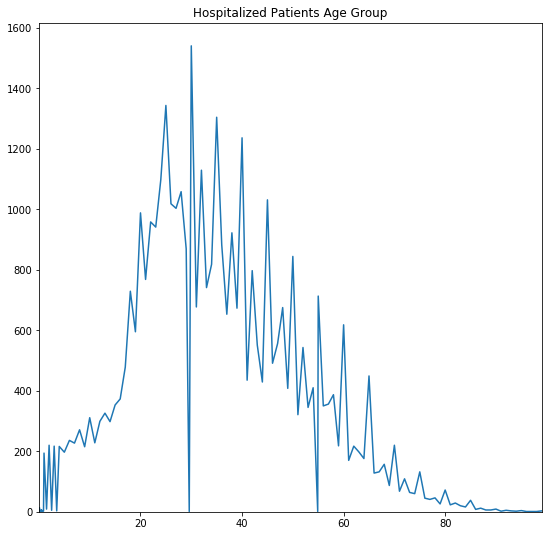

In [137]:
plt.figure(figsize=(9,9));
hosp['age'].value_counts().sort_index().plot(kind='line');
plt.ylim(bottom=0);
plt.title('Hospitalized Patients Age Group');

In [138]:
## We can say that: 1. Deceased are with mean age 60 above 
## 2. Recovered patients age is more spread which shows that 25-55 age group people have recovered more

(0, 1661.05)

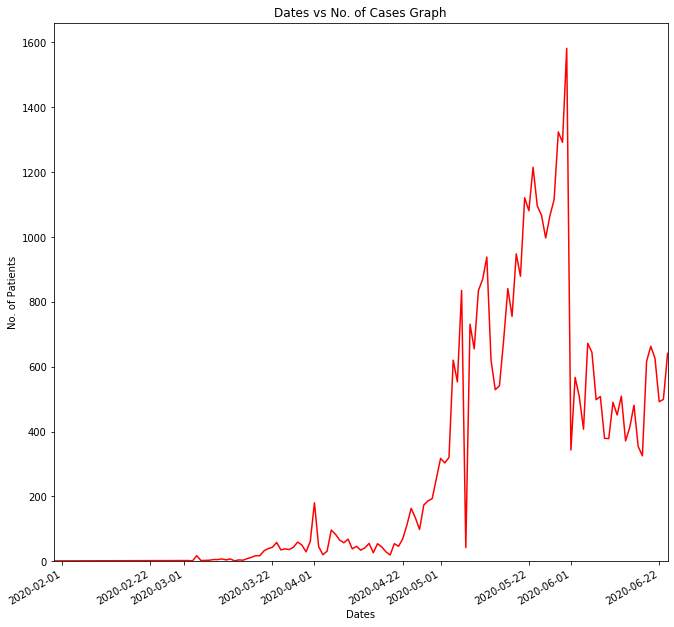

In [139]:
plt.figure(figsize=(11,11))
df_final['date'].value_counts().sort_values().plot(kind='line',color='r')
plt.title('Dates vs No. of Cases Graph');
plt.ylabel('No. of Patients');
plt.xlabel('Dates');
plt.ylim(bottom=0)

### Which date most number of cases of Recovered,Deceased,Hospitalised

(0, 15.7)

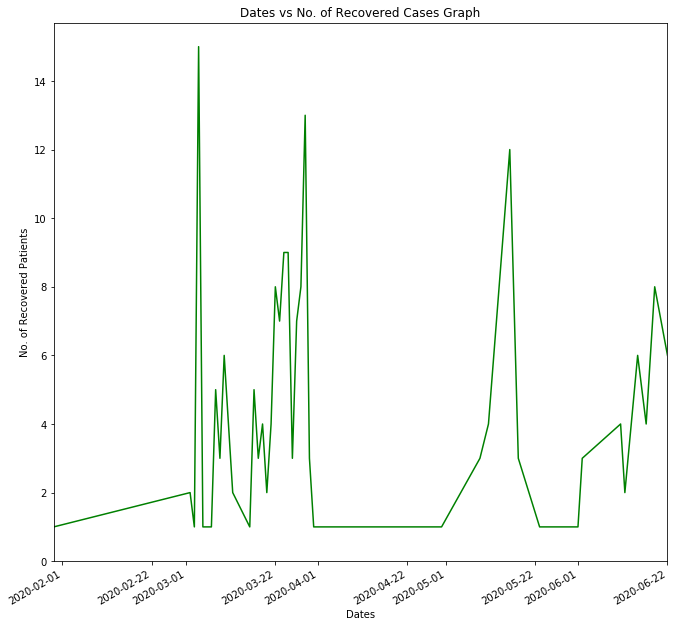

In [140]:
plt.figure(figsize=(11,11))
rec['date'].value_counts().sort_values().plot(kind='line',color='g')
plt.title('Dates vs No. of Recovered Cases Graph');
plt.ylabel('No. of Recovered Patients');
plt.xlabel('Dates');
plt.ylim(bottom=0)

(0, 1645.3)

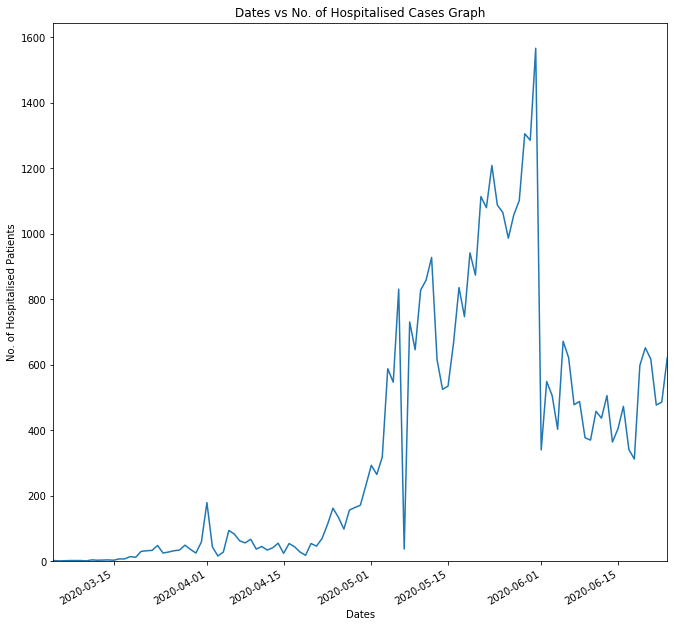

In [141]:
plt.figure(figsize=(11,11))
hosp['date'].value_counts().sort_values().plot(kind='line')
plt.title('Dates vs No. of Hospitalised Cases Graph');
plt.ylabel('No. of Hospitalised Patients');
plt.xlabel('Dates');
plt.ylim(bottom=0)

(0, 39.85)

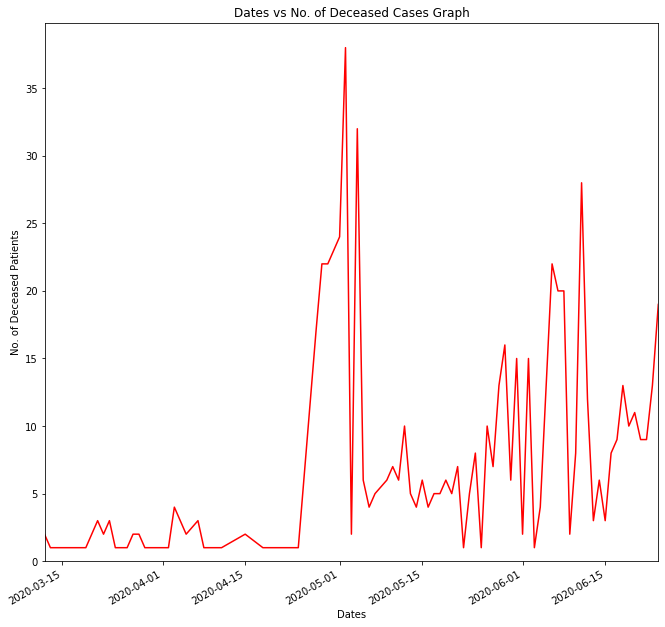

In [142]:
plt.figure(figsize=(11,11))
dcs['date'].value_counts().sort_values().plot(kind='line',color='r')
plt.title('Dates vs No. of Deceased Cases Graph');
plt.ylabel('No. of Deceased Patients');
plt.xlabel('Dates');
plt.ylim(bottom=0)

### Deceased #: 38  Date:  02/05/2020    
### Hospital#: 1567 Date : 31/05/2020   
### Recovered#: 15 Date: 04/03/2020    

### Cumulative Cases Calculation

In [143]:
df_new=pd.DataFrame()

In [144]:
df_new['date']=list(set(df_final['date']))
df_new=df_new.sort_values(by='date')

In [145]:
#df_new['dates']=list(x)
df_new['date']

51    2020-01-30
92    2020-03-02
104   2020-03-03
12    2020-03-04
106   2020-03-05
         ...    
74    2020-06-20
36    2020-06-21
70    2020-06-22
4     2020-06-23
102   2020-06-24
Name: date, Length: 115, dtype: datetime64[ns]

In [146]:
dfn= df_final.sort_values(by=['date'])

In [147]:
x_count = dfn.groupby('date')['date'].value_counts().tolist()

In [148]:
df_new['ValueCounts']=x_count

In [149]:
df_new['cumsum']=df_new['ValueCounts'].cumsum()

In [150]:
df_new.tail()

,date,ValueCounts,cumsum
74,2020-06-20,663,38497
36,2020-06-21,626,39123
70,2020-06-22,492,39615
4,2020-06-23,499,40114
102,2020-06-24,641,40755


### Visualisation

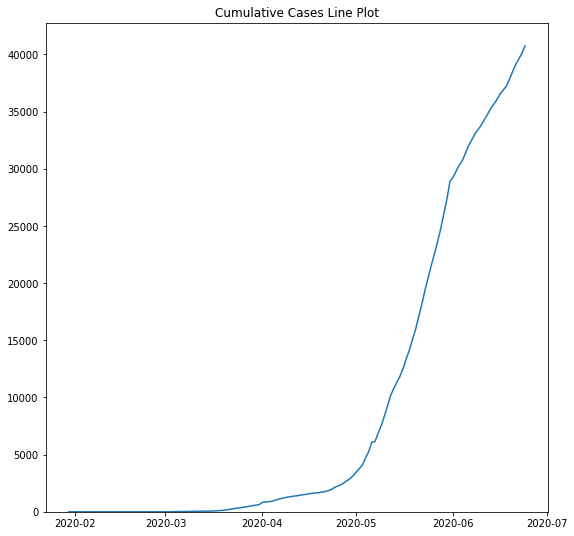

In [151]:
plt.figure(figsize=(9,9))
plt.plot(df_new['date'],df_new['cumsum']);
plt.ylim(bottom=0);
plt.title('Cumulative Cases Line Plot');

In [152]:
dfn[dfn['status']=='Deceased']['date']

72     2020-03-12
76     2020-03-12
81     2020-03-13
181    2020-03-19
326    2020-03-21
          ...    
6857   2020-06-24
6858   2020-06-24
6859   2020-06-24
6860   2020-06-24
6861   2020-06-24
Name: date, Length: 644, dtype: datetime64[ns]

In [153]:
dcs_new = dfn[dfn['status']=='Deceased'].sort_values(by=['date'])
df_dcs=pd.DataFrame()

In [154]:
xx=set(dcs_new['date'])
xx = list(xx)
xx.sort()
df_dcs['date'] = xx

In [155]:
dcs_list =dcs_new.groupby('date')['date'].value_counts().tolist()
df_dcs['ValCount']=dcs_list

In [156]:
df_dcs.head()

,date,ValCount
0,2020-03-12,2
1,2020-03-13,1
2,2020-03-19,1
3,2020-03-21,3
4,2020-03-22,2


In [157]:
df_dcs['cumsum']=df_dcs['ValCount'].cumsum()

In [158]:
df_dcs.head()

,date,ValCount,cumsum
0,2020-03-12,2,2
1,2020-03-13,1,3
2,2020-03-19,1,4
3,2020-03-21,3,7
4,2020-03-22,2,9


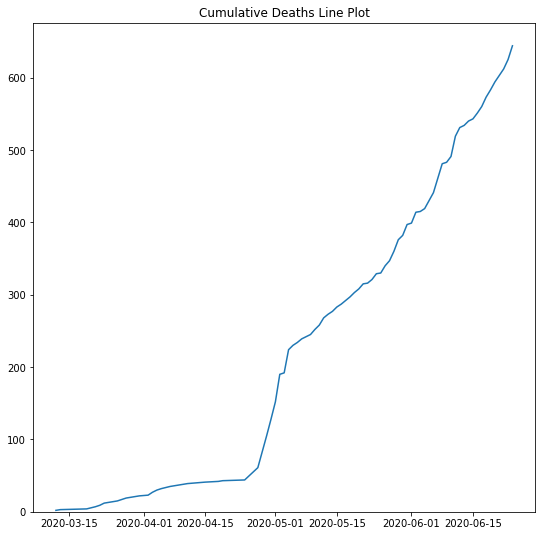

In [159]:
plt.figure(figsize=(9,9))
plt.plot(df_dcs['date'],df_dcs['cumsum']);
plt.ylim(bottom=0);
plt.title('Cumulative Deaths Line Plot');